In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy.optimize
from pathlib import Path
import glob
import common

common.pltsetup()

In [2]:
def load_dist(path):
    lines = [l.strip().split() for l in Path(path).read_text().split('\n') if l]
    origins = np.array([i*10000 for i, l in enumerate(lines)])
    nodes = np.array([float(l[0].strip()) for l in lines])
    edges = np.array([float(l[1].strip()) for l in lines])
    # contents = np.array([float(l[2].strip()) for l in lines])
    origins = origins / origins[-1]
    nodes = nodes / nodes[-1]
    edges = edges / edges[-1]
    # contents = contents / contents[-1]
    return origins, nodes, edges


allnodes = []
alledges = []
for f in glob.glob('data/subdataset-size-function/*.csv'):
    origins, curnodes, curedges = load_dist(f)
    allnodes.append(curnodes)
    alledges.append(curedges)


nodes = sum(allnodes) / len(allnodes)
edges = sum(alledges) / len(alledges)

nodes_variance = [np.std(values) for values in zip(*allnodes)]
edges_variance = [np.std(values) for values in zip(*alledges)]
print(sum(nodes_variance) / len(nodes_variance) * 100)
print(sum(edges_variance) / len(edges_variance) * 100)

0.10188438452560425
1.0896866426145897


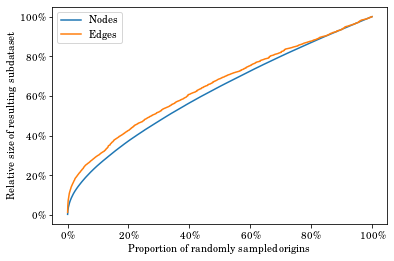

In [6]:
fig = plt.figure()
ax = fig.add_subplot()
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel("Proportion of randomly sampled origins")
ax.set_ylabel("Relative size of resulting subdataset")
ax.plot(origins, nodes, label="Nodes")
ax.plot(origins, edges, label="Edges")
ax.legend()
# ax.plot(origins, contents)
plt.savefig("../img/graph-exploitation/subdataset_size_function.pdf", dpi=200)

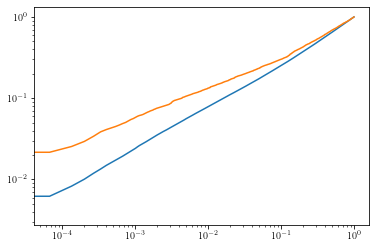

In [7]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(origins, nodes)
ax.plot(origins, edges)

In [8]:
def fitted_func(params):
    return params[0] * np.log(np.exp(params[1]) * origins ** np.exp(params[2]) + 1)

def nodes_fitter(params):
    residuals = nodes - fitted_func(params)
    return np.sum(np.square(residuals))

def edges_fitter(params):
    residuals = edges - fitted_func(params)
    return np.sum(np.square(residuals))

%time coeffs_nodes = scipy.optimize.minimize(nodes_fitter, [1, 1, 1])
%time coeffs_edges = scipy.optimize.minimize(edges_fitter, [1, 1, 1])

CPU times: user 1.84 s, sys: 0 ns, total: 1.84 s
Wall time: 1.84 s
CPU times: user 1.82 s, sys: 820 µs, total: 1.82 s
Wall time: 1.82 s


In [9]:
for coeffs in (coeffs_nodes, coeffs_edges):
    print(f"{coeffs.x[0]} * np.log(1 + {np.exp(coeffs.x[1])} * x ** {np.exp(coeffs.x[2])})")

503.4844444201155 * np.log(1 + 0.001977137524274157 * x ** 0.6089625876392628)
663.8036956800034 * np.log(1 + 0.001486190278433398 * x ** 0.5167404067845233)


In [10]:
def simplified_nodes_func():
    return 500 * np.log(1 + 0.0020 * origins ** 0.61)

def simplified_edges_func():
    return 660 * np.log(1 + 0.0015 * origins ** 0.52)

nodes_hat = fitted_func(coeffs_nodes.x)
nodes_hat_simplified = simplified_nodes_func()

edges_hat = fitted_func(coeffs_edges.x)
edges_hat_simplified = simplified_edges_func()

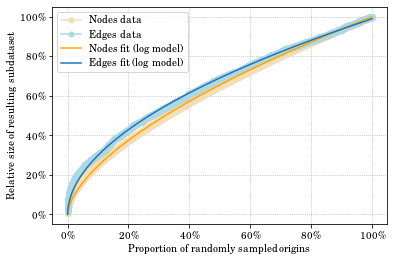

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel("Proportion of randomly sampled origins")
ax.set_ylabel("Relative size of resulting subdataset")

# plt.plot(origins, nodes_hat)
ax.plot(origins, nodes, label="Nodes data", marker=".", color='wheat', markersize=10, rasterized=True)
ax.plot(origins, edges, label="Edges data", marker=".", color='lightblue', markersize=10, rasterized=True)

ax.plot(origins, nodes_hat_simplified, label="Nodes fit (log model)", color='orange', )

# plt.plot(origins, edges_hat)
ax.plot(origins, edges_hat_simplified, label="Edges fit (log model)")
ax.legend()
ax.grid()
plt.savefig("../img/graph-exploitation/subdataset_size_function_fit.pdf", dpi=200)

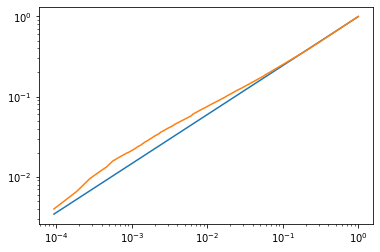

In [10]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(x, y_hat)
ax.plot(x, y)

In [23]:
np.var(nodes, axis=origins.astype(int))

TypeError: only integer scalar arrays can be converted to a scalar index

In [24]:
origins.astype(int)

array([0, 0, 0, ..., 0, 0, 1])